In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [6]:
#get data
series = pd.read_csv(r'C:\Users\I539797\Documents\Thesis\Datasets\Formatted Datasets\formatted_saopaulo.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = pd.DataFrame(series.groupby('Date')['MeanTravelTimeSeconds'].mean())
series = series.asfreq(pd.infer_freq(series.index))
series = series.diff().dropna()

In [7]:
#check stationarity
perform_adf_test(series)

ADF Statistic: -10.083444
p-value: 0.000000


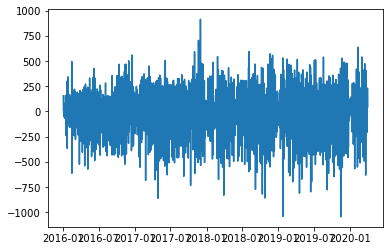

In [8]:
plt.plot(series)

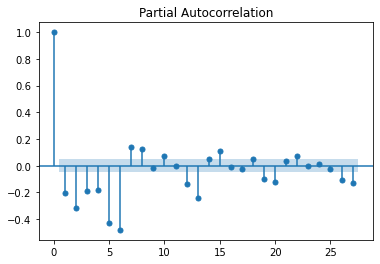

In [17]:
plot_pacf(series, lags=27)
plt.show()

c:\users\i539797\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\i539797\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning

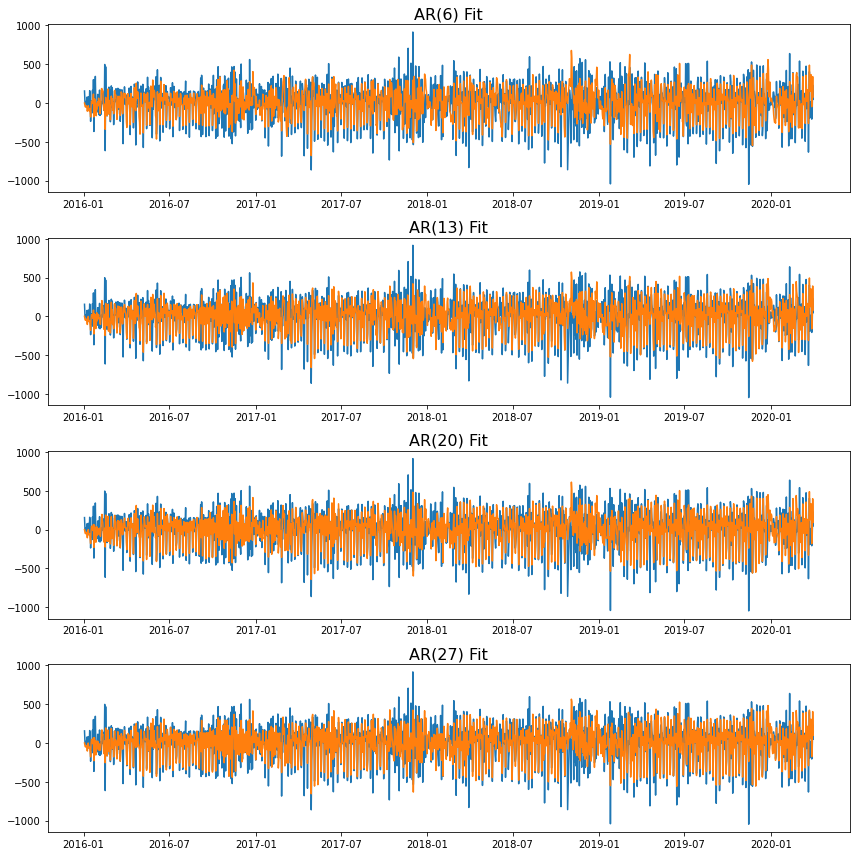

In [18]:
plt.figure(figsize=(12,12))

ar_orders = [6, 13, 20, 27]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARMA(series, order=(ar_order,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

In [19]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(6): 20445.11722344767
AIC for AR(13): 20276.183150815137
AIC for AR(20): 20221.226366196974
AIC for AR(27): 20177.493850096333


In [20]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(6): 20487.859456962324
BIC for AR(13): 20356.324838655113
BIC for AR(20): 20338.767508362274
BIC for AR(27): 20332.434446586954
